In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

2024-08-01 16:07:38.851852: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-01 16:07:38.952330: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-01 16:07:38.952344: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-08-01 16:07:38.975965: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-01 16:07:39.638009: W tensorflow/stream_executor/platform/de

In [2]:
df_test = pd.read_csv("test.csv")

In [3]:
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train = pd.read_csv("train.csv")
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = df_train.drop('label', axis=1)
y = df_train['label']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [8]:
X_train = X_train.values
X_test = X_test.values

In [9]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [10]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [11]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.2,
)

datagen.fit(X_train)

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_uniform',input_shape=(28, 28, 1)))

2024-08-01 16:07:44.089834: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-01 16:07:44.089949: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-01 16:07:44.089997: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2024-08-01 16:07:44.090041: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2024-08-01 16:07:44.090083: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [13]:
model.add(BatchNormalization())

In [14]:
Conv2D(32, (3, 3), activation='relu')

In [15]:
model.add(MaxPooling2D((2, 2)))

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(10, activation='softmax'))

In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
          epochs=20,
          validation_data=(X_test, y_test))

Epoch 1/20
525/525 [==============================] - 16s 30ms/step - loss: 1.1189 - accuracy: 0.6089 - val_loss: 0.3262 - val_accuracy: 0.9174
Epoch 2/20
525/525 [==============================] - 15s 29ms/step - loss: 0.3635 - accuracy: 0.8940 - val_loss: 0.2183 - val_accuracy: 0.9443
Epoch 3/20
525/525 [==============================] - 15s 29ms/step - loss: 0.2562 - accuracy: 0.9233 - val_loss: 0.2121 - val_accuracy: 0.9415
Epoch 4/20
525/525 [==============================] - 15s 29ms/step - loss: 0.2094 - accuracy: 0.9392 - val_loss: 0.1883 - val_accuracy: 0.9469
Epoch 5/20
525/525 [==============================] - 15s 29ms/step - loss: 0.1834 - accuracy: 0.9456 - val_loss: 0.1540 - val_accuracy: 0.9576
Epoch 6/20
525/525 [==============================] - 15s 29ms/step - loss: 0.1708 - accuracy: 0.9494 - val_loss: 0.2477 - val_accuracy: 0.9287
Epoch 7/20
525/525 [==============================] - 15s 29ms/step - loss: 0.1522 - accuracy: 0.9549 - val_loss: 0.1183 - val_accuracy:

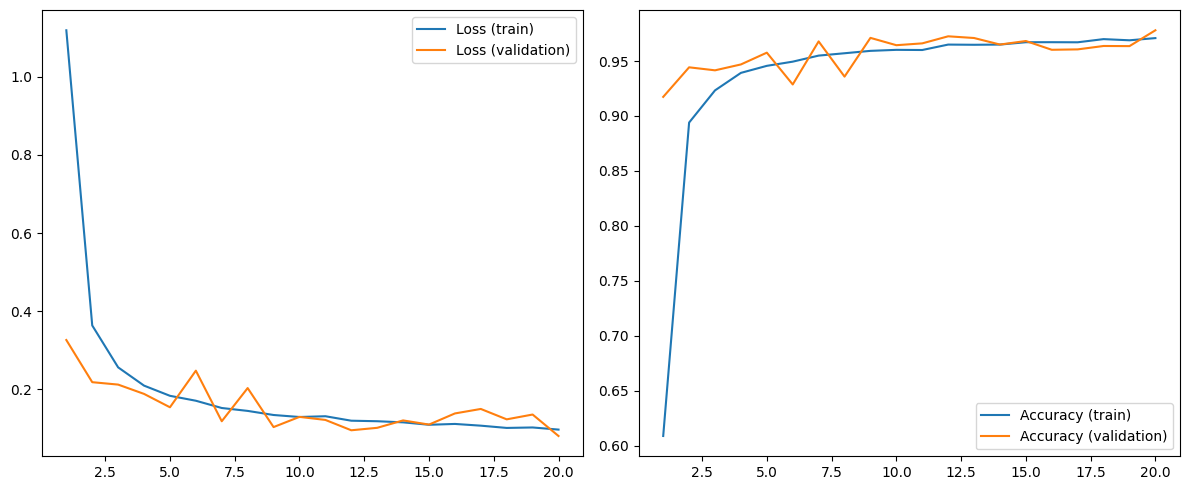

In [19]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict.get('val_loss', [])
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict.get('val_accuracy', [])
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, label='Loss (train)')
plt.plot(epochs, val_loss_values, label='Loss (validation)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_values, label='Accuracy (train)')
plt.plot(epochs, val_accuracy_values, label='Accuracy (validation)')
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
model.save('CNN_model.h5')